In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [2]:

import pandas as pd


df = pd.read_csv("Dataset.csv")

df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
print(df.columns.tolist())


['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [4]:
df['smoking_history'] = df['smoking_history'].replace({
    'former': 'past',
    'not current': 'past'
})


In [5]:
# Shape of the dataset
print("Dataset Shape:", df.shape)


Dataset Shape: (100000, 9)


In [6]:
#  missing values
print("Missing Values:\n")
print(df.isnull().sum())


Missing Values:

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000
mean,41.886436,0.074890,0.03944,27.320931,5.527600,138.06200,0.085050
std,22.516261,0.263215,0.19464,6.636665,1.070764,40.70876,0.278957
min,0.080000,0.000000,0.00000,10.010000,3.500000,80.00000,0.000000
25%,24.000000,0.000000,0.00000,23.630000,4.800000,100.00000,0.000000
50%,43.000000,0.000000,0.00000,27.320000,5.800000,140.00000,0.000000
75%,60.000000,0.000000,0.00000,29.580000,6.200000,159.00000,0.000000
max,80.000000,1.000000,1.00000,95.690000,9.000000,300.00000,1.000000


In [9]:

from sklearn.preprocessing import LabelEncoder

# Create separate encoders for each column to avoid confusion
gender_encoder = LabelEncoder()
smoke_encoder = LabelEncoder()

# Encode 'gender'
df['gender'] = gender_encoder.fit_transform(df['gender'])

# Encode 'smoking_history'
df['smoking_history'] = smoke_encoder.fit_transform(df['smoking_history'])

# Save the mappings for interpretation
print("Gender Mapping:", dict(zip(gender_encoder.classes_, gender_encoder.transform(gender_encoder.classes_))))
print("Smoking History Mapping:", dict(zip(smoke_encoder.classes_, smoke_encoder.transform(smoke_encoder.classes_))))



Gender Mapping: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
Smoking History Mapping: {'No Info': np.int64(0), 'current': np.int64(1), 'ever': np.int64(2), 'never': np.int64(3), 'past': np.int64(4)}


In [10]:
# Check first few rows
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [11]:
from sklearn.model_selection import train_test_split

# Select features and target
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
            'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression

#train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9591

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18291
           1       0.87      0.61      0.72      1709

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
rf_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print(" Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\n Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


 Random Forest Accuracy: 0.9704

 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18291
           1       0.95      0.69      0.80      1709

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate
print("Accuracy :", round(accuracy_score(y_test, xgb_pred), 4))
print("Precision:", round(precision_score(y_test, xgb_pred), 4))
print("Recall   :", round(recall_score(y_test, xgb_pred), 4))
print("F1 Score :", round(f1_score(y_test, xgb_pred), 4))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, xgb_pred))



Accuracy : 0.9715
Precision: 0.9582
Recall   : 0.6969
F1 Score : 0.8069

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18291
           1       0.96      0.70      0.81      1709

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [16]:
import joblib

# Save trained model
joblib.dump(xgb_model, "diabetes_xgb_model.pkl")

# Save label encoders if needed
joblib.dump(gender_encoder, "gender_encoder.pkl")
joblib.dump(smoke_encoder, "smoke_encoder.pkl")


['smoke_encoder.pkl']

In [17]:
# Extract feature importances from the trained XGBoost model
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show the top features
print(importance_df)


               Feature  Importance
6          HbA1c_level    0.567975
7  blood_glucose_level    0.295745
3        heart_disease    0.033756
2         hypertension    0.030790
1                  age    0.029107
5                  bmi    0.016927
4      smoking_history    0.013784
0               gender    0.011917


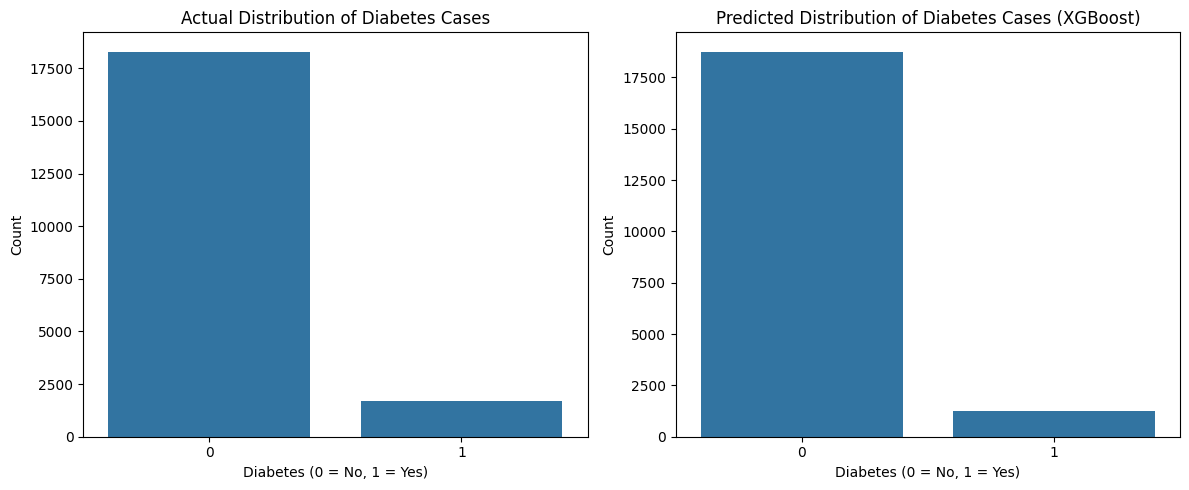

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": xgb_pred  # You can replace xgb_pred with rf_pred or y_pred for other models
})

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot actual distribution
sns.countplot(x=comparison_df["Actual"], ax=axes[0])
axes[0].set_title("Actual Distribution of Diabetes Cases")
axes[0].set_xlabel("Diabetes (0 = No, 1 = Yes)")
axes[0].set_ylabel("Count")

# Plot predicted distribution
sns.countplot(x=comparison_df["Predicted"], ax=axes[1])
axes[1].set_title("Predicted Distribution of Diabetes Cases (XGBoost)")
axes[1].set_xlabel("Diabetes (0 = No, 1 = Yes)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


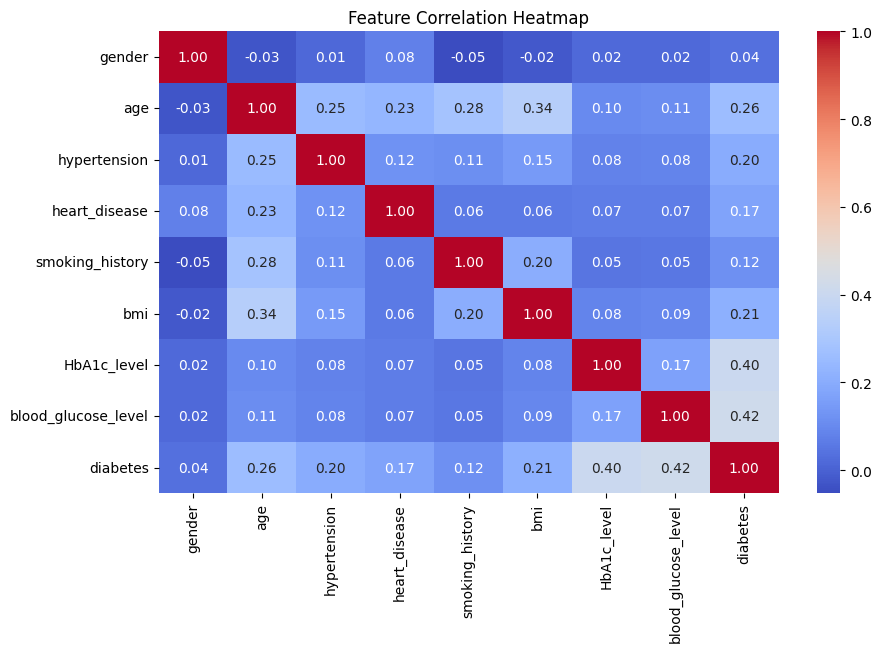

In [19]:
# Plot correlation heatmap for all features
plt.figure(figsize=(10, 6))

# Create a heatmap of feature correlations
# .corr() calculates the Pearson correlation coefficient between all pairs of columns
sns.heatmap(
    df.corr(),
    annot=True,          # Show the correlation values
    cmap='coolwarm',     # Color theme (red = strong positive, blue = strong negative)
    fmt=".2f"            # Show numbers with 2 decimal places
)

# Add title
plt.title("Feature Correlation Heatmap")
plt.show()


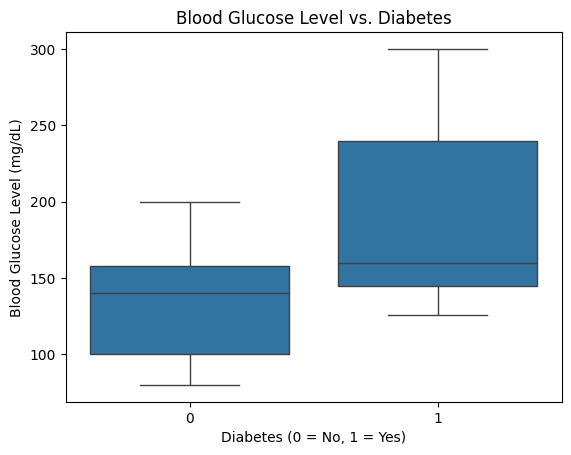

In [20]:
# Boxplot to compare Blood Glucose Levels for Diabetic vs Non-Diabetic individuals
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)

# Add title and axis labels
plt.title("Blood Glucose Level vs. Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Blood Glucose Level (mg/dL)")

plt.show()


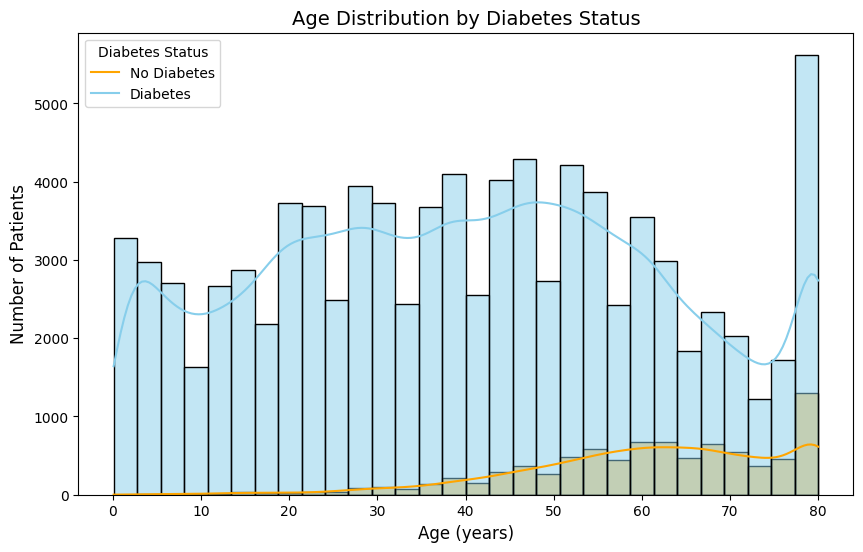

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of Age distribution, split by Diabetes status
plt.figure(figsize=(10, 6))

# 'data=df' → DataFrame containing all patient data
# x='age' → Age column is plotted on the x-axis
# hue='diabetes' → Split the bars by diabetes status (0 = No Diabetes, 1 = Diabetes)
# bins=30 → Divide the age range into 30 intervals
# kde=True → Add smooth lines (Kernel Density Estimation) for trend visualization
sns.histplot(
    data=df,
    x='age',
    hue='diabetes',
    bins=30,
    kde=True,
    palette={0: "skyblue", 1: "orange"}  # Assign colors to each group
)

# Set the chart title
plt.title("Age Distribution by Diabetes Status", fontsize=14)

# Set labels for axes
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

# Add a legend with correct labels
plt.legend(
    title="Diabetes Status",
    labels=["No Diabetes", "Diabetes"],
    loc="upper left"
)

# Display the plot
plt.savefig("Age Distribution by Diabetes.png", dpi=300,bbox_inches='tight')
plt.show()


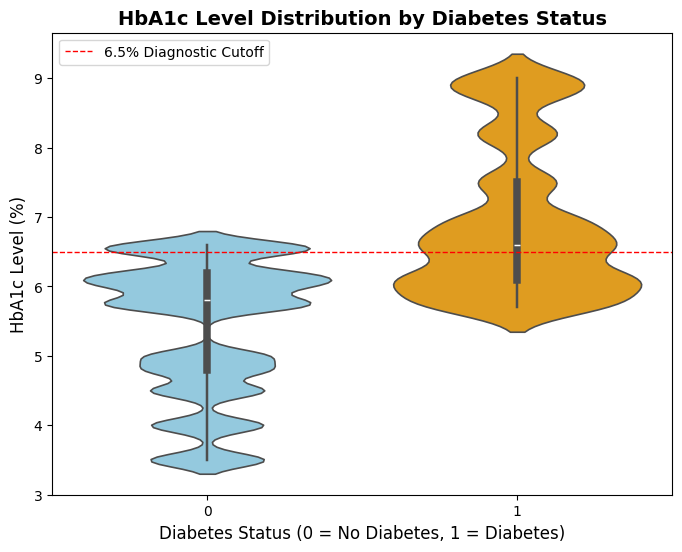

In [22]:
plt.figure(figsize=(8, 6))

sns.violinplot(
    x='diabetes',
    y='HbA1c_level',
    hue='diabetes',
    data=df,
    palette={0: 'skyblue', 1: 'orange'},
    inner='box',
    linewidth=1.2,
    legend=False,
    density_norm='count'   # replaces scale='count' to avoid FutureWarning
)

# Add a diagnostic threshold line
plt.axhline(6.5, color='red', ls='--', lw=1, label='6.5% Diagnostic Cutoff')

plt.title('HbA1c Level Distribution by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status (0 = No Diabetes, 1 = Diabetes)', fontsize=12)
plt.ylabel('HbA1c Level (%)', fontsize=12)
plt.legend()
plt.show()


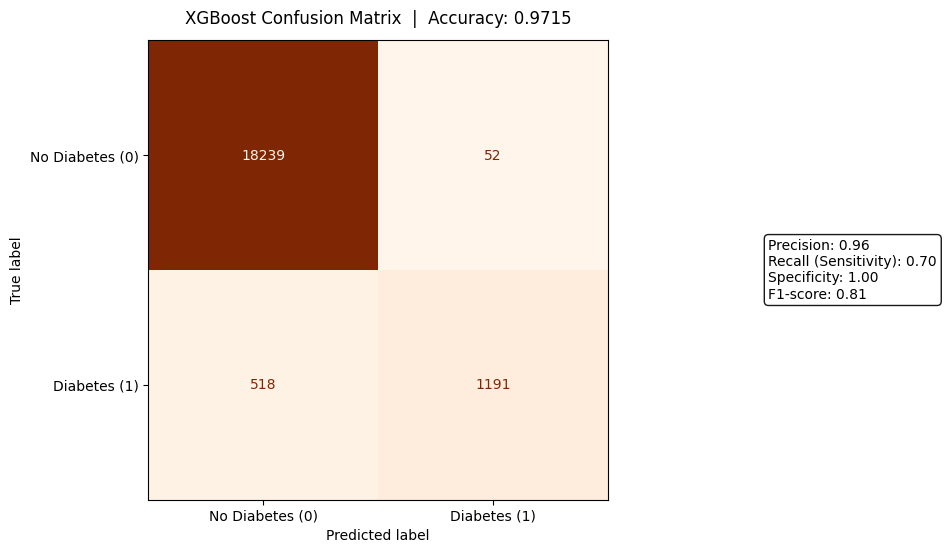

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)

# Get predictions from the trained XGBoost model
xgb_pred = xgb_model.predict(X_test)

# Build confusion matrix (rows = actual, columns = predicted)
#    With binary labels 0 (No Diabetes) and 1 (Diabetes), the layout is:
#      [[TN, FP],
#       [FN, TP]]
cm = confusion_matrix(y_test, xgb_pred, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes (0)", "Diabetes (1)"])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Oranges", ax=ax, colorbar=False)

# Compute core metrics
acc  = accuracy_score(y_test, xgb_pred)
prec = precision_score(y_test, xgb_pred)
rec  = recall_score(y_test, xgb_pred)
f1   = f1_score(y_test, xgb_pred)
spec = tn / (tn + fp) if (tn + fp) > 0 else 0

# Title + small metrics panel for quick reading
ax.set_title(f"XGBoost Confusion Matrix  |  Accuracy: {acc:.4f}", fontsize=12, pad=12)
text = (f"Precision: {prec:.2f}\n"
        f"Recall (Sensitivity): {rec:.2f}\n"
        f"Specificity: {spec:.2f}\n"
        f"F1-score: {f1:.2f}")
# Add a neat text box on the right
ax.text(1.35, 0.5, text, transform=ax.transAxes,
        bbox=dict(facecolor="white", alpha=0.9, boxstyle="round"),
        va="center", ha="left", fontsize=10)

plt.tight_layout()
plt.show()


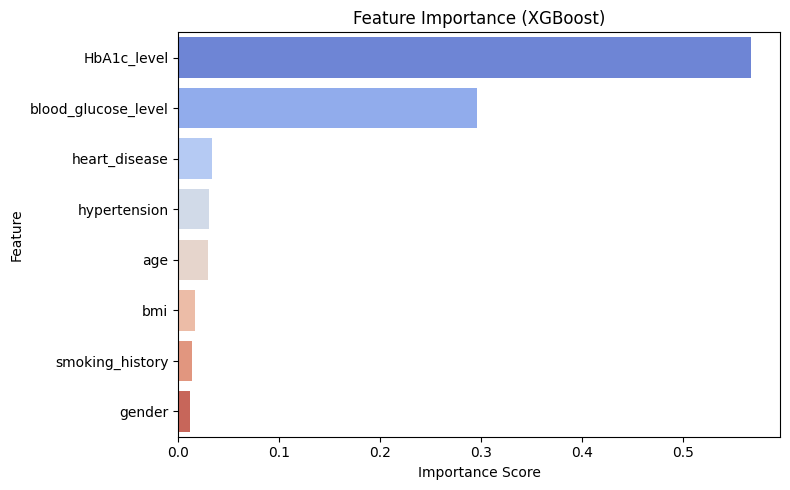

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Build importance table from the trained XGBoost model
importance_df = (
    pd.DataFrame({
        "Feature": X_train.columns,                       # feature names in the same order used for training
        "Importance": xgb_model.feature_importances_      # relative contribution per feature
    })
    .sort_values("Importance", ascending=False)
)

# 2) Plot the top 10 most important features
plt.figure(figsize=(8, 5))
sns.barplot(
    data=importance_df.head(10),
    x="Importance",
    y="Feature",
    hue="Feature",          # fixes the seaborn palette warning
    dodge=False,
    palette="coolwarm",
    legend=False            # legend not needed; feature names are on the y-axis
)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


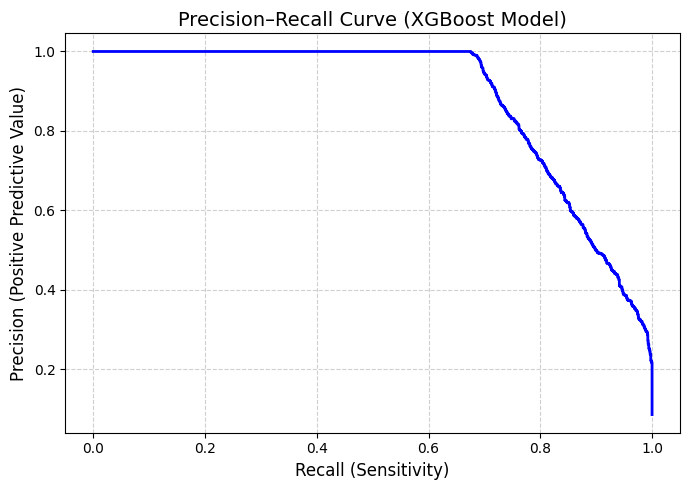

In [25]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 1) Get predicted probabilities for the positive class (diabetes = 1)
# predict_proba returns probabilities for BOTH classes [prob_no, prob_yes]
# [:, 1] selects only the probability of being diabetic
probs = xgb_model.predict_proba(X_test)[:, 1]

# 2) Calculate precision, recall at various probability thresholds
# precision → of all patients predicted as diabetic, how many actually are
# recall    → of all actual diabetics, how many were correctly predicted
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# 3) Plot Precision–Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='blue', linewidth=2)

# 4) Add labels, title, and grid for better readability
plt.title("Precision–Recall Curve (XGBoost Model)", fontsize=14)
plt.xlabel("Recall (Sensitivity)", fontsize=12)
plt.ylabel("Precision (Positive Predictive Value)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# 5) Display the plot
plt.tight_layout()
plt.show()


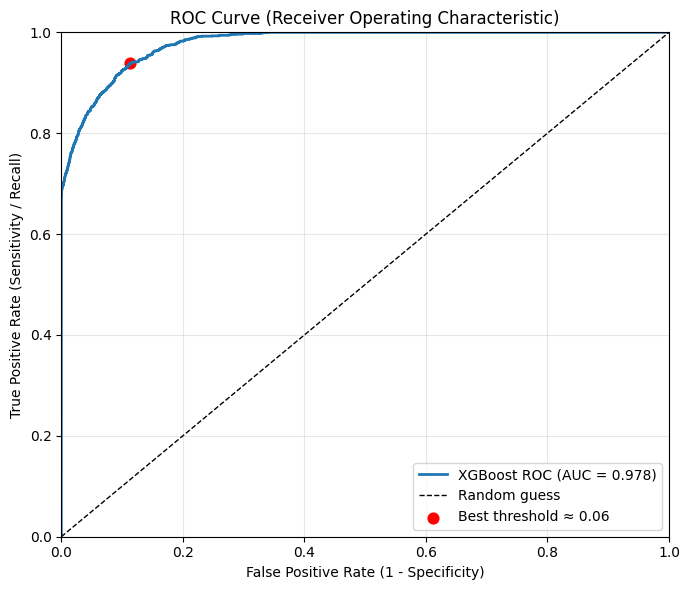

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Get model probabilities for the positive class (diabetes = 1)
#    Many sklearn-compatible models expose predict_proba; we use [:, 1] for P(class=1)
probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC points and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, linewidth=2, label=f"XGBoost ROC (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], "k--", linewidth=1, label="Random guess")

# mark the point closest to perfect classification (0,1)
youden_idx = np.argmax(tpr - fpr)        # Youden’s J statistic
plt.scatter(fpr[youden_idx], tpr[youden_idx], s=60, color="red",
            label=f"Best threshold ≈ {thresholds[youden_idx]:.2f}")

# 4) Formatting
plt.title("ROC Curve (Receiver Operating Characteristic)")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity / Recall)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


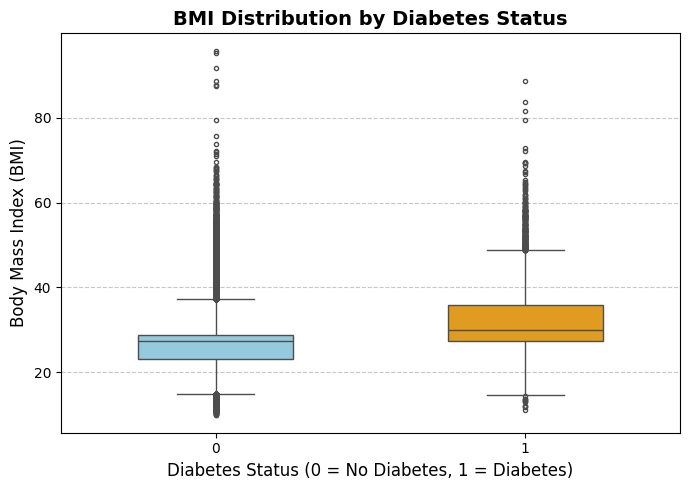

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'diabetes' column is integer type for proper palette mapping
df['diabetes'] = df['diabetes'].astype(int)

# ------------------------------
# Boxplot: BMI Distribution by Diabetes Status
# ------------------------------

plt.figure(figsize=(7, 5))

sns.boxplot(
    data=df,
    x="diabetes",        # Categorical variable (0 = No Diabetes, 1 = Diabetes)
    y="bmi",             # Continuous variable (BMI values)
    hue="diabetes",      # Assign hue to avoid future warnings
    dodge=False,         # Keeps boxes aligned
    palette={0: "skyblue", 1: "orange"},  # Consistent colors
    width=0.5,
    fliersize=3
)

# Title & Labels
plt.title("BMI Distribution by Diabetes Status", fontsize=14, fontweight="bold")
plt.xlabel("Diabetes Status (0 = No Diabetes, 1 = Diabetes)", fontsize=12)
plt.ylabel("Body Mass Index (BMI)", fontsize=12)

# Remove legend (since x-axis already labels categories)
plt.legend([], [], frameon=False)

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


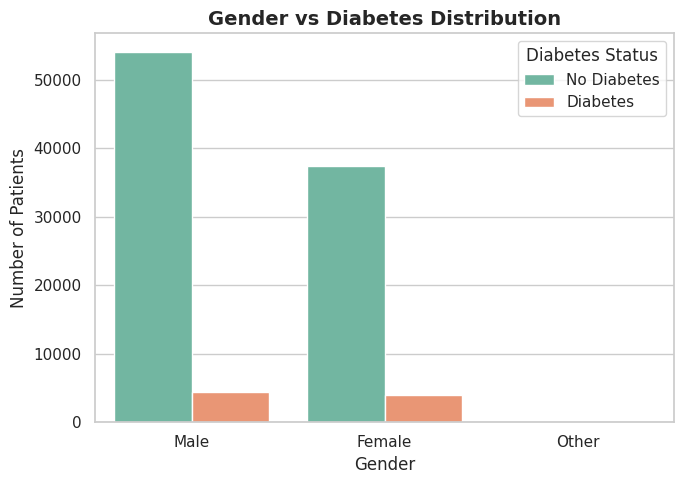

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style for better readability
sns.set(style="whitegrid")

# Create a grouped bar chart to compare diabetes counts by gender
plt.figure(figsize=(7, 5))
ax = sns.countplot(
    data=df,
    x='gender',
    hue='diabetes',
    palette='Set2'
)

# Add title and axis labels
plt.title("Gender vs Diabetes Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

# Rename x-axis tick labels without warning
plt.xticks(ticks=[0, 1, 2], labels=['Male', 'Female', 'Other'])

# Improve legend
plt.legend(
    title='Diabetes Status',
    labels=['No Diabetes', 'Diabetes']
)

# Display the plot
plt.tight_layout()
plt.show()


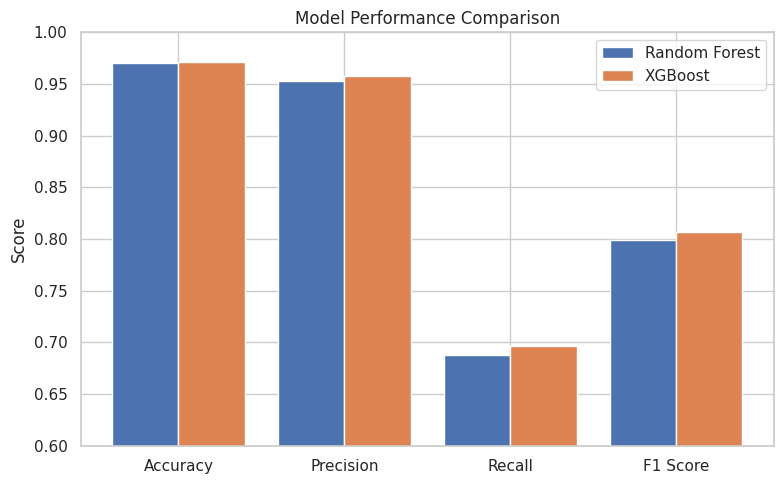

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions for both models
rf_preds  = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Function to calculate scores
def get_scores(y_true, y_pred):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred)
    ]

# Calculate metrics dynamically
rf_scores  = get_scores(y_test, rf_preds)
xgb_scores = get_scores(y_test, xgb_preds)

# Plot the bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(metrics))
width = 0.4

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, rf_scores, width, label='Random Forest')
plt.bar(x + width/2, xgb_scores, width, label='XGBoost')

plt.xticks(x, metrics)
plt.ylim(0.6, 1.0)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_diabetes_stream(
    total_samples=100_000,
    batch_size=50,
    prevalence=0.085,           # ~8.5% positives in your dataset
    sensitivity=0.72,           # P(model predicts 1 | actual 1)
    specificity=0.99,           # P(model predicts 0 | actual 0)
    seed=42,
    per_batch_jitter=0.02       # small random jitter to vary sens/spec by batch
):
    """
    Simulate a real-time stream of patients processed in batches.
    For each batch, generate true labels using prevalence, then generate model
    predictions using sensitivity/specificity. Returns a tidy per-batch DataFrame.

    Parameters
    ----------
    total_samples : int
        Total number of patients to simulate.
    batch_size : int
        Number of patients per batch.
    prevalence : float in [0,1]
        Probability that a randomly drawn patient truly has diabetes.
    sensitivity : float in [0,1]
        Model's true positive rate (recall) for class 1.
    specificity : float in [0,1]
        Model's true negative rate for class 0.
    seed : int
        RNG seed for reproducibility.
    per_batch_jitter : float
        Size of random jitter applied to sensitivity/specificity per batch
        to mimic real-world variation.

    Returns
    -------
    df : pd.DataFrame
        Columns per batch:
        - batch_id, batch_size, p_true (positives), n_true (negatives)
        - TP, FP, FN, TN
        - predicted_positives, predicted_negatives
        - accuracy, precision, recall, specificity
        - sens_used, spec_used (the actually used rates after jitter)
    """
    rng = np.random.default_rng(seed)

    # Number of batches (drop any leftover if not divisible)
    num_batches = total_samples // batch_size

    rows = []
    for b in range(1, num_batches + 1):
        # --- 1) Draw true labels for this batch using prevalence
        y_true = rng.binomial(1, prevalence, size=batch_size)

        p_true = int(y_true.sum())         # # of actual diabetics
        n_true = batch_size - p_true       # # of actual non-diabetics

        # --- 2) Slightly vary sens/spec per batch to look realistic
        sens_used = np.clip(sensitivity + rng.normal(0, per_batch_jitter), 0, 1)
        spec_used = np.clip(specificity + rng.normal(0, per_batch_jitter), 0, 1)

        # --- 3) Generate predictions given y_true, sens/spec
        # For positives: predict 1 with probability = sensitivity
        # For negatives: predict 0 with probability = specificity
        y_pred = np.empty_like(y_true)
        pos_idx = (y_true == 1)
        neg_idx = ~pos_idx

        y_pred[pos_idx] = rng.binomial(1, sens_used, size=pos_idx.sum())
        # For negatives, predicting 0 with spec => predicting 1 with (1 - spec)
        y_pred[neg_idx] = rng.binomial(1, 1 - spec_used, size=neg_idx.sum())

        # --- 4) Confusion matrix pieces for the batch
        TP = int(((y_true == 1) & (y_pred == 1)).sum())
        FN = int(((y_true == 1) & (y_pred == 0)).sum())
        FP = int(((y_true == 0) & (y_pred == 1)).sum())
        TN = int(((y_true == 0) & (y_pred == 0)).sum())

        # --- 5) Metrics (guard against divide-by-zero)
        accuracy   = (TP + TN) / batch_size
        precision  = TP / (TP + FP) if (TP + FP) > 0 else 0.0
        recall     = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        specificity_batch = TN / (TN + FP) if (TN + FP) > 0 else 0.0

        rows.append({
            "batch_id": b,
            "batch_size": batch_size,
            "p_true": p_true,
            "n_true": n_true,
            "TP": TP, "FP": FP, "FN": FN, "TN": TN,
            "predicted_positives": int((y_pred == 1).sum()),
            "predicted_negatives": int((y_pred == 0).sum()),
            "accuracy": round(accuracy, 4),
            "precision": round(precision, 4),
            "recall": round(recall, 4),
            "specificity": round(specificity_batch, 4),
            "sens_used": round(sens_used, 3),
            "spec_used": round(spec_used, 3),
        })

    return pd.DataFrame(rows)


# --------- Usage ----------
simulation_full_df = simulate_diabetes_stream(
    total_samples=100_000,
    batch_size=50,
    prevalence=0.085,      # match your dataset's class ratio (~8.5% positives)
    sensitivity=0.70,      # plug in your model's recall for class 1
    specificity=0.997,     # from your confusion matrix (very high spec)
    seed=42
)

# Peek
simulation_full_df.head()


,batch_id,batch_size,p_true,n_true,TP,FP,FN,TN,predicted_positives,predicted_negatives,accuracy,precision,recall,specificity,sens_used,spec_used
0,1,50,4,46,2,0,2,46,2,48,0.96,1.0,0.5000,1.0000,0.714,0.998
1,2,50,4,46,4,1,0,45,5,45,0.98,0.8,1.0000,0.9783,0.697,0.976
2,3,50,5,45,4,1,1,44,5,45,0.96,0.8,0.8000,0.9778,0.674,0.975
3,4,50,5,45,4,0,1,45,4,46,0.98,1.0,0.8000,1.0000,0.701,1.000
4,5,50,7,43,5,0,2,43,5,45,0.96,1.0,0.7143,1.0000,0.705,1.000


In [32]:
!pip -q install xgboost scikit-learn

import joblib, json, xgboost as xgb

# 1) Convert the XGBoost model to a safe JSON file
xgb_clf = joblib.load("diabetes_xgb_model.pkl")     # your trained XGBClassifier
booster = xgb_clf.get_booster()                    # raw XGBoost booster
booster.save_model("diabetes_xgb_model.json")      # <- SAFE file to upload

# 2) Convert encoders to JSON (just store their classes_)
gender_encoder = joblib.load("gender_encoder.pkl")
smoke_encoder  = joblib.load("smoke_encoder.pkl")

with open("gender_encoder.json", "w") as f:
    json.dump(gender_encoder.classes_.tolist(), f)

with open("smoke_encoder.json", "w") as f:
    json.dump(smoke_encoder.classes_.tolist(), f)

print("Done! Files created: diabetes_xgb_model.json, gender_encoder.json, smoke_encoder.json")


Done! Files created: diabetes_xgb_model.json, gender_encoder.json, smoke_encoder.json


In [33]:
import os
os.environ["GRADIO_USE_SSR"] = "0"

import json
import pandas as pd
import xgboost as xgb
import gradio as gr

MODEL_PATH = "diabetes_xgb_model.json"
GENDER_PATH = "gender_encoder.json"
SMOKE_PATH  = "smoke_encoder.json"

FEATURES = [
    "gender", "age", "hypertension", "heart_disease", "smoking_history",
    "bmi", "HbA1c_level", "blood_glucose_level"
]

def _load_json(path, fallback):
    try:
        with open(path, "r") as f:
            data = json.load(f)
        print(f"[LOAD OK] {path}: type={type(data).__name__}")
        return data
    except Exception as e:
        print(f"[LOAD FAIL] {path}: {e}")
        return fallback

def _to_mapping_and_choices(obj, default_list):
    if isinstance(obj, dict):
        return obj, list(obj.keys())
    if isinstance(obj, list):
        return {cls: i for i, cls in enumerate(obj)}, obj
    return {cls: i for i, cls in enumerate(default_list)}, default_list

# ---- model ----
booster = xgb.Booster()
booster.load_model(MODEL_PATH)
print("[MODEL] Booster loaded")

# ---- encoders ----
gender_raw = _load_json(GENDER_PATH, ["Female", "Male", "Other"])
smoke_raw  = _load_json(SMOKE_PATH,  ["No Info", "current", "ever", "never", "past"])

gender_map, gender_choices = _to_mapping_and_choices(gender_raw, ["Female", "Male", "Other"])
smoke_map,  smoke_choices  = _to_mapping_and_choices(smoke_raw,  ["No Info", "current", "ever", "never", "past"])

def predict_diabetes(gender, age, htn, hd, smoking, bmi, hba1c, glucose):
    row = pd.DataFrame([{
        "gender": gender_map.get(gender, 0),
        "age": age,
        "hypertension": int(htn),
        "heart_disease": int(hd),
        "smoking_history": smoke_map.get(smoking, 0),
        "bmi": bmi,
        "HbA1c_level": hba1c,
        "blood_glucose_level": glucose
    }], columns=FEATURES)

    dmat = xgb.DMatrix(row, feature_names=FEATURES)
    prob = float(booster.predict(dmat)[0])
    label = "Diabetic" if prob >= 0.5 else "Non-Diabetic"
    return label, f"{prob:.3f}"

with gr.Blocks(title="Diabetes Predictor (XGBoost)") as demo:
    gr.Markdown("## Diabetes Prediction (XGBoost)")
    with gr.Row():
        with gr.Column():
            g = gr.Dropdown(gender_choices, value=gender_choices[0], label="Gender")
            age = gr.Slider(1, 100, value=40, step=1, label="Age")
            htn = gr.Dropdown([0, 1], value=0, label="Hypertension (0/1)")
            hd  = gr.Dropdown([0, 1], value=0, label="Heart disease (0/1)")
            smk = gr.Dropdown(smoke_choices, value=smoke_choices[0], label="Smoking history")
            bmi = gr.Slider(10.0, 60.0, value=27.0, step=0.1, label="BMI")
            hba1c = gr.Slider(3.5, 12.0, value=5.8, step=0.1, label="HbA1c (%)")
            glu = gr.Slider(60, 300, value=140, step=1, label="Blood glucose (mg/dL)")
            btn = gr.Button("Predict")
        with gr.Column():
            out_label = gr.Textbox(label="Prediction")
            out_prob  = gr.Textbox(label="Probability of Diabetes")

    btn.click(predict_diabetes, [g, age, htn, hd, smk, bmi, hba1c, glu], [out_label, out_prob])

demo.launch()


[MODEL] Booster loaded
[LOAD OK] gender_encoder.json: type=list
[LOAD OK] smoke_encoder.json: type=list
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6a6f49875cfc154029.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [34]:
from IPython.display import Markdown

huggingface_url = "https://huggingface.co/spaces/Riyaz329/diabetes-predictor"
Markdown(f"[Click here to open the Diabetes Predictor App]({huggingface_url})")

[Click here to open the Diabetes Predictor App](https://huggingface.co/spaces/Riyaz329/diabetes-predictor)